In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier

In [2]:
##Uploading the data
df = pd.read_csv("loan_data.csv")
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [3]:
##Getting info about the data
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
##Checking for nan
df.shape
df.notna()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
44996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
44997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
44998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


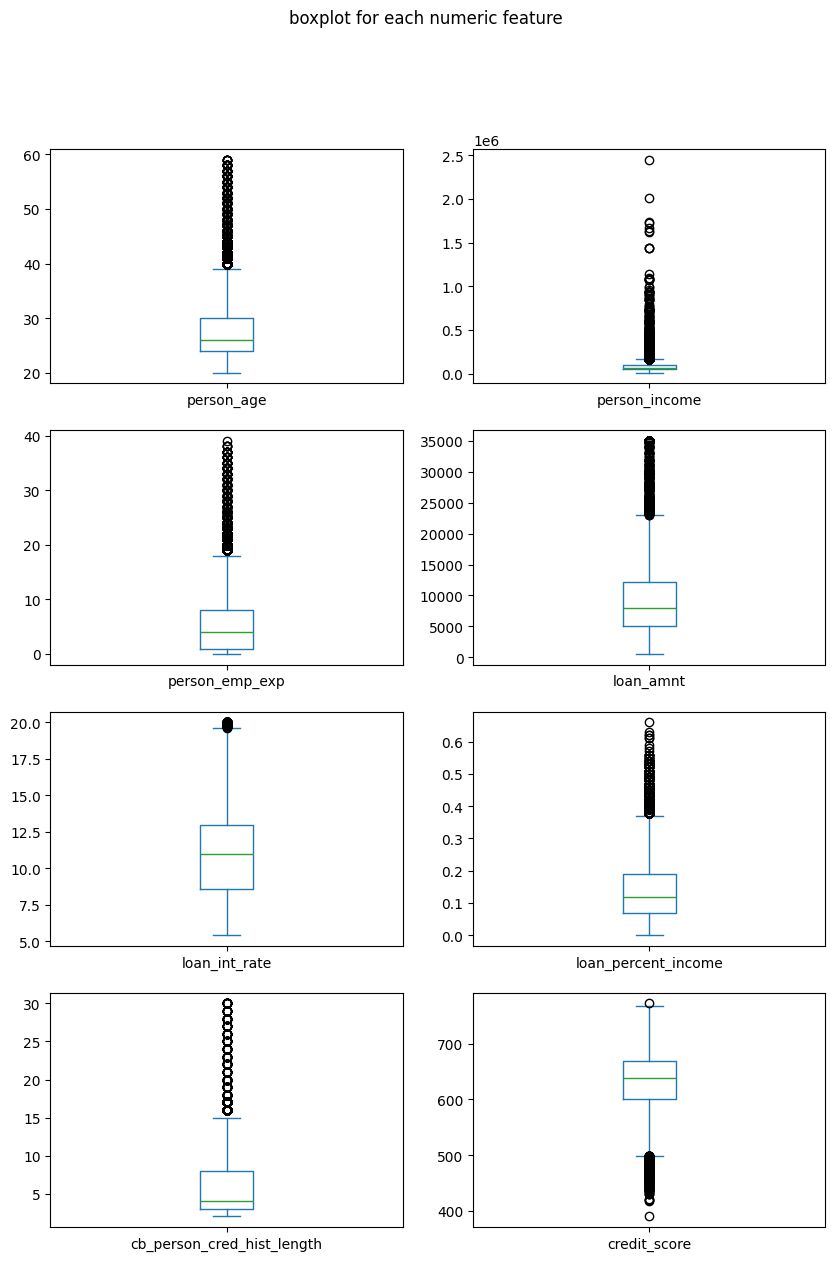

In [28]:
df.select_dtypes(include=np.number).drop("loan_status", axis=1).plot(kind="box", subplots=True, layout=(4,2), figsize=(10,14), sharex=False, sharey=False, title="boxplot for each numeric feature")
plt.savefig("Boxplots.png", dpi=300)
plt.show()

In [7]:
df["person_age"].value_counts(ascending=True)

person_age
109.0       1
116.0       1
94.0        1
80.0        1
78.0        1
76.0        1
67.0        1
84.0        1
123.0       2
144.0       3
63.0        3
73.0        3
69.0        5
59.0        6
62.0        7
70.0        7
64.0        7
65.0       10
66.0       11
61.0       12
60.0       16
20.0       17
57.0       17
56.0       20
58.0       20
54.0       24
55.0       24
53.0       35
52.0       42
51.0       46
50.0       56
49.0       59
48.0       93
47.0      112
46.0      114
45.0      135
44.0      177
43.0      215
42.0      247
41.0      303
40.0      349
39.0      389
38.0      503
37.0      666
36.0      740
35.0      847
34.0      980
33.0     1240
21.0     1289
32.0     1403
31.0     1645
30.0     2021
29.0     2455
28.0     2728
27.0     3095
26.0     3659
22.0     4236
25.0     4507
24.0     5138
23.0     5254
Name: count, dtype: int64

In [8]:
df["person_emp_exp"].value_counts(ascending=True)

person_emp_exp
85        1
124       1
57        1
100       1
101       1
       ... 
4      3524
3      3890
1      4061
2      4134
0      9566
Name: count, Length: 63, dtype: int64

In [9]:
df = df[(df["person_age"]<60) & (df["person_emp_exp"] < 40)]
df.shape

(44904, 14)

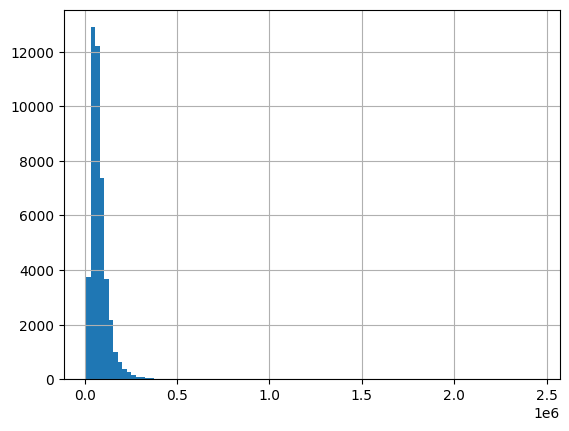

In [31]:

df["person_income"].hist(bins=100)
plt.savefig("Person_income.png")

In [11]:
df.groupby("person_gender")[["person_income"]].mean()

,person_income
person_gender,
female,78949.825668
male,80457.348971


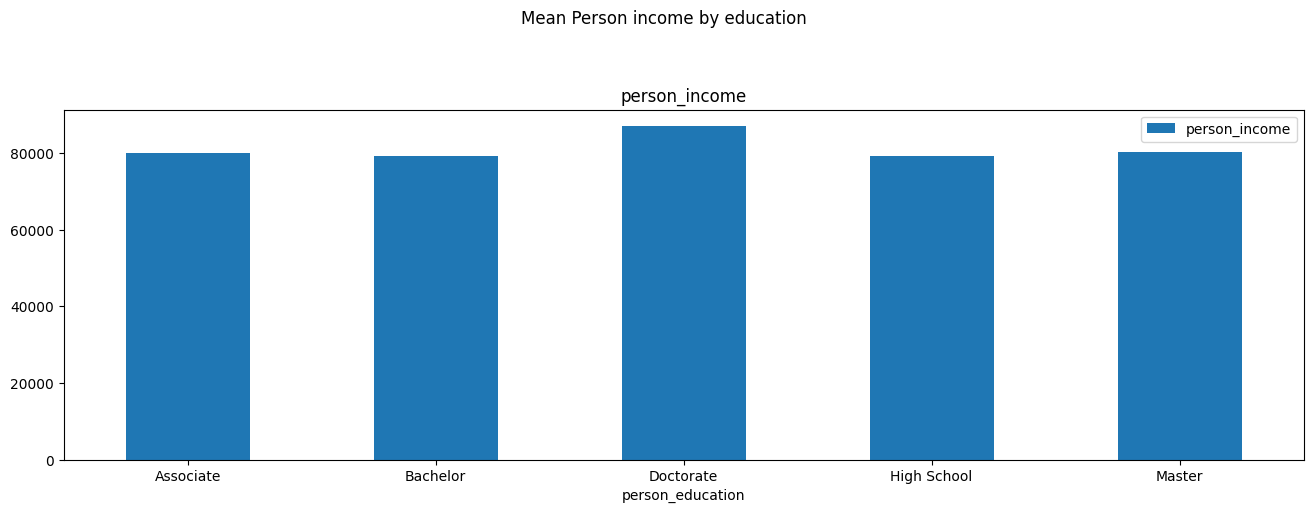

In [33]:
df.groupby("person_education")[["person_income"]].mean().plot(kind="bar", rot= 0, subplots=True, layout=(2,1), figsize=(16,10), sharex=False, sharey=False, title="Mean Person income by education")
plt.savefig("Income_by_education.png")

In [13]:
##Choosing target value 
Y = df["loan_status"]
Y.shape

(44904,)

In [14]:
##Starting making features
X_start = df.drop("loan_status", axis=1)
X_start

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [15]:
###Dividing feature data on numeric and categorical
X_numeric = X_start.select_dtypes(include=np.number)
X_numeric= X_numeric.reset_index(drop=True)
X_numeric

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586
...,...,...,...,...,...,...,...,...
44899,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645
44900,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621
44901,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668
44902,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604


In [16]:
##Choose categorical data
X_categorical = X_start.select_dtypes(include="object")
X_categorical.head()
X_categorical.shape

(44904, 5)

In [17]:
##Encoding categorical data
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X_categorical)
X_encoded.shape

(44904, 5)

In [18]:
##Checking results
X_cat = pd.DataFrame(X_encoded, columns=X_categorical.columns)
X_cat


,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,0.0,4.0,3.0,4.0,0.0
1,0.0,3.0,2.0,1.0,1.0
2,0.0,3.0,0.0,3.0,0.0
3,0.0,1.0,3.0,3.0,0.0
4,1.0,4.0,3.0,3.0,0.0
...,...,...,...,...,...
44899,1.0,0.0,3.0,3.0,0.0
44900,0.0,0.0,3.0,2.0,0.0
44901,1.0,0.0,3.0,0.0,0.0
44902,1.0,1.0,3.0,1.0,0.0


In [19]:
###Uniting numeric and categorical
X = pd.concat([X_cat, X_numeric], axis=1)
X

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,0.0,4.0,3.0,4.0,0.0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561
1,0.0,3.0,2.0,1.0,1.0,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504
2,0.0,3.0,0.0,3.0,0.0,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635
3,0.0,1.0,3.0,3.0,0.0,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675
4,1.0,4.0,3.0,3.0,0.0,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44899,1.0,0.0,3.0,3.0,0.0,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645
44900,0.0,0.0,3.0,2.0,0.0,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621
44901,1.0,0.0,3.0,0.0,0.0,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668
44902,1.0,1.0,3.0,1.0,0.0,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604


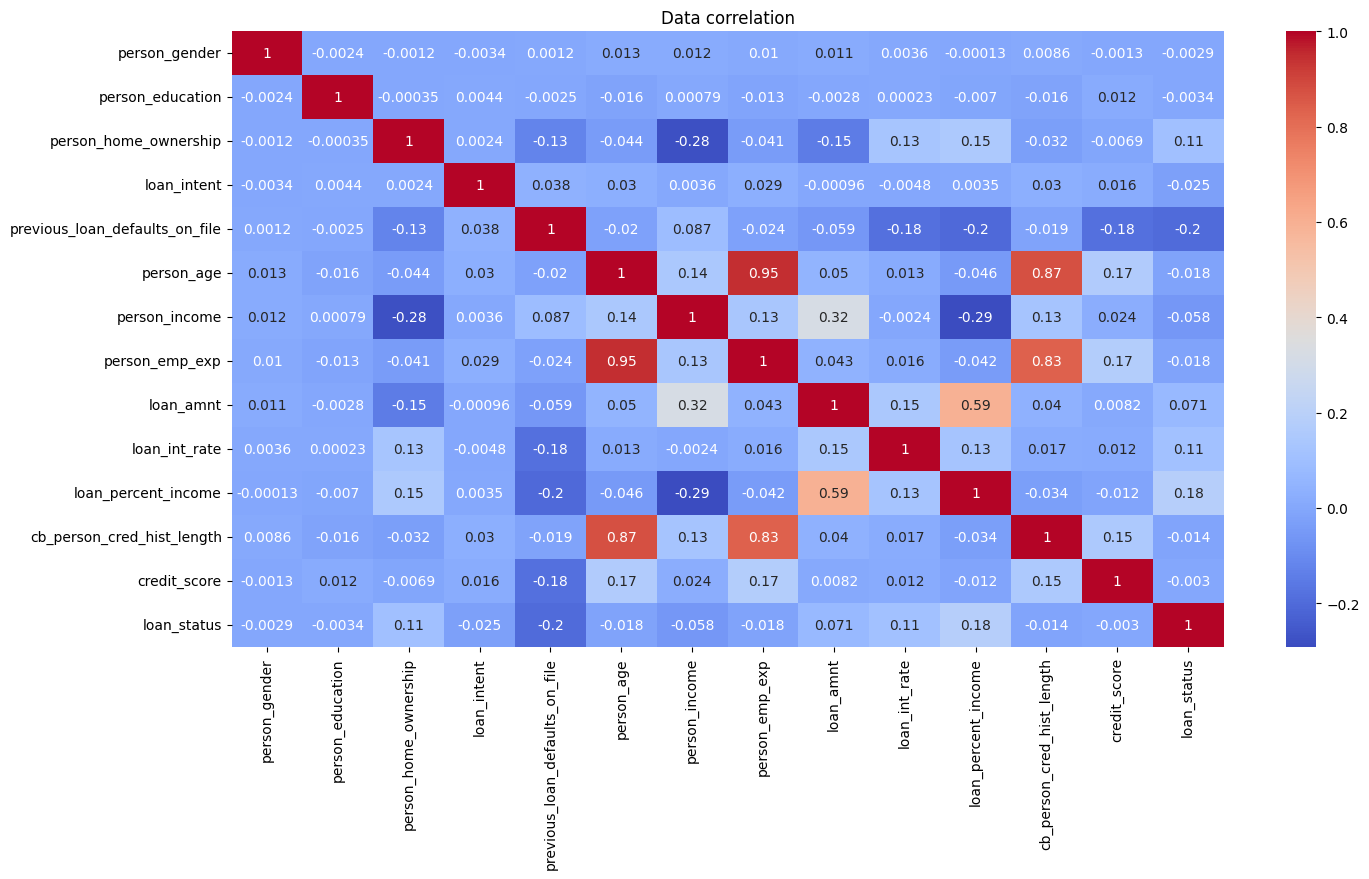

In [45]:
###Showing correlation between data
plt.figure(figsize=(16,8))
sns.heatmap(pd.concat([X,Y],axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Data correlation")
plt.savefig("Data_correlation")
plt.show()

In [21]:
##Splitting data for training and for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
bst = XGBClassifier(n_estimators=2,  max_depth=2, learning_rate=1, objective='binary:logistic')

In [23]:
bst.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
preds = bst.predict(X_test)

In [25]:
print(accuracy_score(preds, Y_test))

0.9036855584010689


In [27]:
bst.save_model("model.bin")

C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
